# Función de distribución de probabilidades

### Distribución Uniforme

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
#genera colección de data random
a = 1 ## limite inferior
b = 100 ## limite superior
n = 1000000 ## cantidad de muestras
data = np.random.uniform(a,b,n)

(array([ 99904., 100208.,  99712.,  99873.,  99930., 100169., 100394.,
        100043.,  99590., 100177.]),
 array([ 1.00001816, 10.90000847, 20.79999877, 30.69998908, 40.59997939,
        50.4999697 , 60.39996   , 70.29995031, 80.19994062, 90.09993093,
        99.99992123]),
 <BarContainer object of 10 artists>)

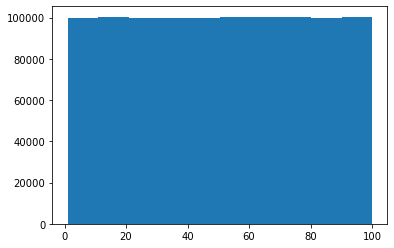

In [26]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

### Campana de Gauss

In [34]:
data = np.random.randn(1000000)

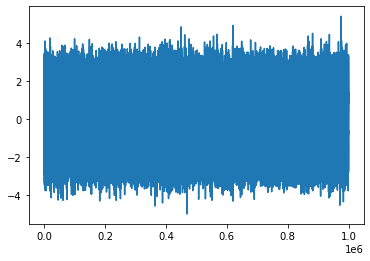

In [36]:
x = range(1,1000001)
plt.plot(x,data)

(array([3.90000e+01, 1.85000e+03, 2.91930e+04, 1.72559e+05, 3.78358e+05,
        3.10910e+05, 9.59590e+04, 1.06670e+04, 4.56000e+02, 9.00000e+00]),
 array([-4.97365659, -3.9374879 , -2.90131921, -1.86515052, -0.82898184,
         0.20718685,  1.24335554,  2.27952423,  3.31569291,  4.3518616 ,
         5.38803029]),
 <BarContainer object of 10 artists>)

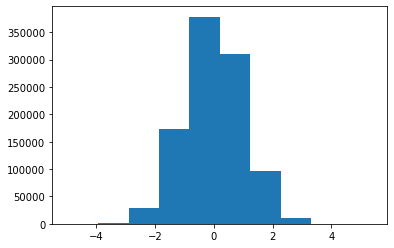

In [37]:
%matplotlib inline
plt.hist(data)

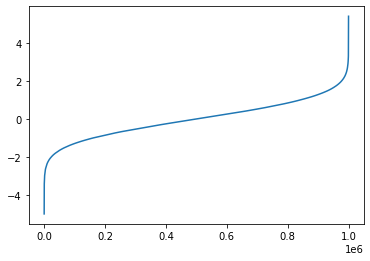

In [39]:
# función de distribución acumulada
plt.plot(x,sorted(data))

(array([  21.,  157.,  768., 2034., 2967., 2489., 1216.,  305.,   39.,
           4.]),
 array([-3.64751047, -1.7003236 ,  0.24686327,  2.19405014,  4.14123701,
         6.08842388,  8.03561075,  9.98279762, 11.92998449, 13.87717136,
        15.82435823]),
 <BarContainer object of 10 artists>)

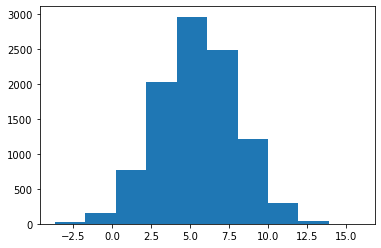

In [41]:
mu = 5.5 ## media
sd = 2.5 ## desviación estándar
z_10000 = np.random.randn(10000)
data = mu + sd * z_10000  # se convierte normal estándar
plt.hist(data)

In [43]:
data = np.random.randn(2,4) ## dos muestras aleatorias de 4
data

array([[ 0.6435168 , -1.30499456, -0.4664919 , -1.53657952],
       [ 0.4901447 ,  1.05492218,  0.31799129,  0.12331469]])

# La simulación de Monte Carlo


Calcular el valor perfecto de PI utilizando el método "Muestreo Aleatorio" entre dos figuras que son un circulo circunscrito en un cuadrado, cuantas veces puede caer un punto dentro del circulo, tomando en cuenta las areas de cada una de las figuras.

* casos favorables / casos posibles => P(caer en el circulo) / P(caer dentro del cuadrado)
* formula area circulo / formula area cuadrado => PI/4

* generamos dos números aleatorios uniforme entre (x e y) 0 y 1 en total 1000 veces
* calcularemos x^2 + y^2
   * si el valor es inferior a 1  -> estamos dentro del circulo
   * si el valor es superior a 1 -> estamos fuera de circulo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de PI
* Repetimos el experimento un número suficiente de veces ( por ejemplo 100) para obtener (100) diferentes aproximaciones de PI
* Calculamos el promedio de los 100 experimentos anteriores para para dar un valor final de PI

   

In [56]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value +=1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return fig



3.140827999999999


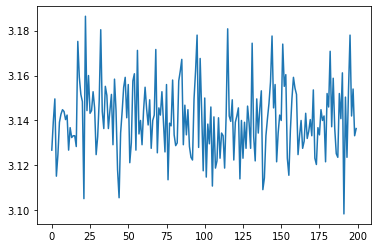

In [58]:
pi_montecarlo(10000,200)

### Dummy Data Sets

In [63]:
n = 1000000
data = pd.DataFrame({
    'A': np.random.randn(n), #debería tener media 0 y desviación 1
    'B': 1.5 + 2.5  * np.random.randn(n), ## normal debe tener una media de 1.5 y una desviación de 2.5
    'C':np.random.uniform(5,32,n) ## uniforme tiene como media entre (5+32)/2 = 18.5 y la desviación
})

In [66]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000229,1.505487,18.500360
std,1.000431,2.501603,7.797294
min,-4.897480,-10.169103,5.000008
25%,-0.676019,-0.178073,11.749117
50%,-0.000826,1.507086,18.490057
75%,0.676666,3.192497,25.262147
max,5.003855,13.870271,31.999975


(array([4.50000e+01, 1.73900e+03, 2.52740e+04, 1.47429e+05, 3.47097e+05,
        3.29769e+05, 1.27647e+05, 1.98040e+04, 1.17300e+03, 2.30000e+01]),
 array([-4.89748032, -3.90734679, -2.91721326, -1.92707973, -0.9369462 ,
         0.05318733,  1.04332086,  2.03345438,  3.02358791,  4.01372144,
         5.00385497]),
 <BarContainer object of 10 artists>)

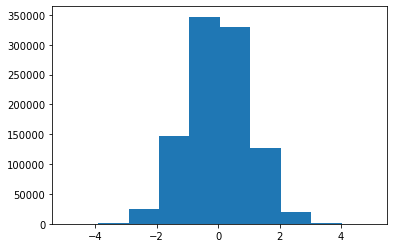

In [69]:
plt.hist(data["A"])

(array([9.30000e+01, 2.87400e+03, 3.43470e+04, 1.67447e+05, 3.50434e+05,
        3.09340e+05, 1.15451e+05, 1.87670e+04, 1.22200e+03, 2.50000e+01]),
 array([-10.16910259,  -7.76516523,  -5.36122787,  -2.95729052,
         -0.55335316,   1.8505842 ,   4.25452156,   6.65845892,
          9.06239628,  11.46633364,  13.870271  ]),
 <BarContainer object of 10 artists>)

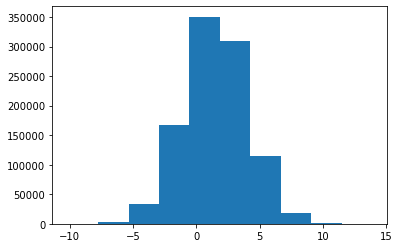

In [70]:
plt.hist(data["B"])

(array([ 99893., 100295.,  99749., 100123., 100331.,  99713.,  99638.,
         99849., 100272., 100137.]),
 array([ 5.00000813,  7.70000485, 10.40000156, 13.09999828, 15.79999499,
        18.49999171, 21.19998843, 23.89998514, 26.59998186, 29.29997858,
        31.99997529]),
 <BarContainer object of 10 artists>)

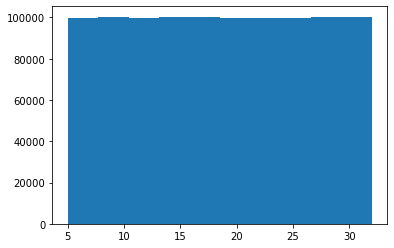

In [71]:
plt.hist(data["C"])

In [72]:
data = pd.read_csv("../edson/OneDrive/Documents/Anaconda/udemy/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [73]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [74]:
column_names = data.columns.values.tolist()

In [75]:
a = len(column_names)

In [80]:
new_data = pd.DataFrame({
    'Column Name':column_names,
    'A':np.random.randn(a),
    'B':np.random.uniform(0,1,a)
}, index = range(42,42+a))

In [81]:
new_data

,Column Name,A,B
42,State,-1.824840,0.941761
43,Account Length,1.010697,0.619970
44,Area Code,-1.064139,0.891373
45,Phone,-2.911608,0.235056
46,Int'l Plan,-0.171279,0.724308
47,VMail Plan,0.222618,0.552250
48,VMail Message,1.322606,0.092090
49,Day Mins,-0.782471,0.398067
50,Day Calls,-0.573133,0.357112
51,Day Charge,-1.100941,0.757242
